## AISC2000 Application Exercise 1
## Spring 2024

### Objective: Learn the basics of exploratory data analysis (EDA) in Python with Pandas, NumPy, Matplotlib, and seaborn (optional).

### Contribution Table
| Student Name | Student ID       | Contribution (%) |
| -------------------- | ---------- | ---------------- |
| Urjeet Parmar                            | 500233403            | 20                               |
| Prakash Phakami Pun                      | 500225030            | 20                               |
| Isha Savaliya                            | 500233657            | 20                               |
| Gurbachan Singh                          | 500224821            | 20                               |
| Ogechi Tina Ukanwune                     | 500230864            | 20                               |

### 1. Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import MinMaxScaler, Binarizer, Normalizer, StandardScaler, LabelEncoder
from sklearn.feature_selection import chi2, RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline
warnings.filterwarnings('ignore')

### 2. Load the data into dataframe
<hr/>

- Read data from LoanTrain.csv file as "rawdata"

In [2]:
rawdata = pd.read_csv('LoanTrain.csv')
rawdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<hr>

- print the names of the headers

In [3]:
header_names=rawdata.columns.tolist()
header_names

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

<hr/>

- print the shape of the data

In [4]:
rawdata.shape

(614, 13)

<hr />

- get each attribute's data type

In [5]:
rawdata.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

<hr />

- print the first three line of data

In [6]:
rawdata.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


### 3. Check for missing values and drop rows and columns with missing values

In [7]:
rawdata.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Dropping null values wit dropna

In [8]:
# Check for missing values
missing_values = rawdata.isnull().sum()

# Drop rows with missing values
data = rawdata.dropna()

# Drop columns with missing values
data = data.dropna(axis=1)

After Dropping Null Values

In [9]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### 4. Obtain summary (descriptive statistics) of the rawdata and data
- Descriptive statics of raw data

In [10]:
rawdata.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
# Descriptive Statics of data
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


### 5. Univariate Analysis using “data” only

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


Mean: 1.6780798147875502
Median: 1.0355246430915357
Standard Deviation: 1.9846725995932972
Variance: 3.9389253275764164
Skewness: 3.527776897784789


Text(0.5, 1.0, 'Histogram with KDE')

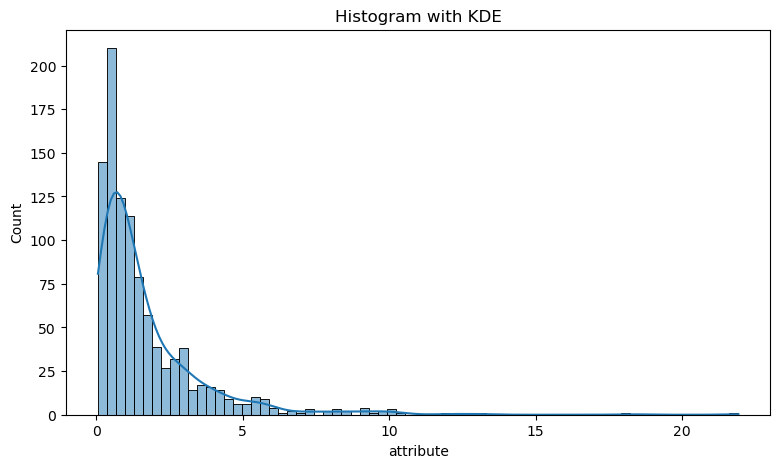

In [13]:
new_data = {'attribute': np.random.lognormal(mean=0, sigma=1, size=1000)}
df = pd.DataFrame(new_data)

# Descriptive Statistics
mean_val = df['attribute'].mean()
median_val = df['attribute'].median()
std_dev = df['attribute'].std()
variance_val = df['attribute'].var()
skewness_val = df['attribute'].skew()

print(f"Mean: {mean_val}")
print(f"Median: {median_val}")
print(f"Standard Deviation: {std_dev}")
print(f"Variance: {variance_val}")
print(f"Skewness: {skewness_val}")

# Visual Analysis
plt.figure(figsize=(20, 5))

# Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(df['attribute'], kde=True)
plt.title('Histogram with KDE')

In [14]:
# Interpretation of Skewness
if skewness_val > 0:
    print("The distribution is right-skewed.")
elif skewness_val < 0:
    print("The distribution is left-skewed.")
else:
    print("The distribution is symmetric.")

The distribution is right-skewed.


In [15]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


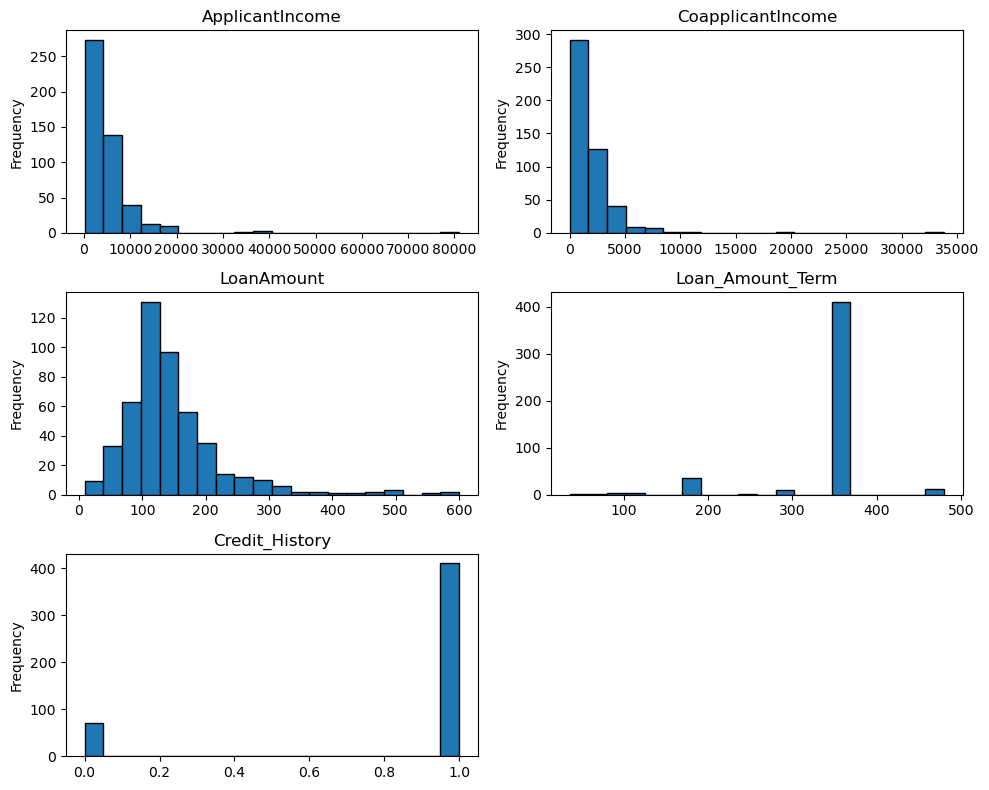

In [17]:
# Plot histograms for each numerical features
columns_of_interest = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

plt.figure(figsize=(10, 8))

for i, col in enumerate(columns_of_interest, 1):
    plt.subplot(3, 2, i)
    data[col].plot(kind='hist', bins=20, edgecolor='black')
    plt.title(col)

plt.tight_layout()
plt.show()

### Generating Density Plot For Numerical Features

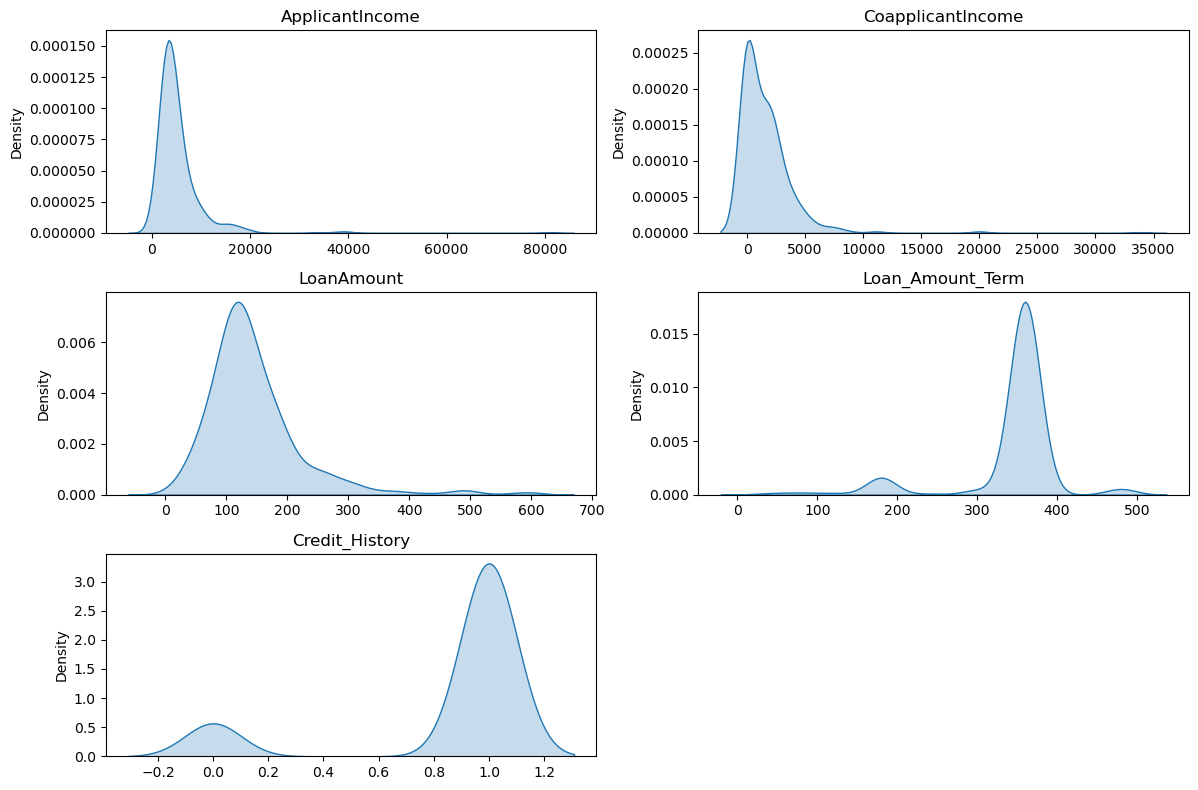

In [18]:
# Select the numerical columns of interest
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Plot density plots for each numerical feature
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.kdeplot(data[col],fill=True)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

### Generating Box/Whisker plots for numerical features

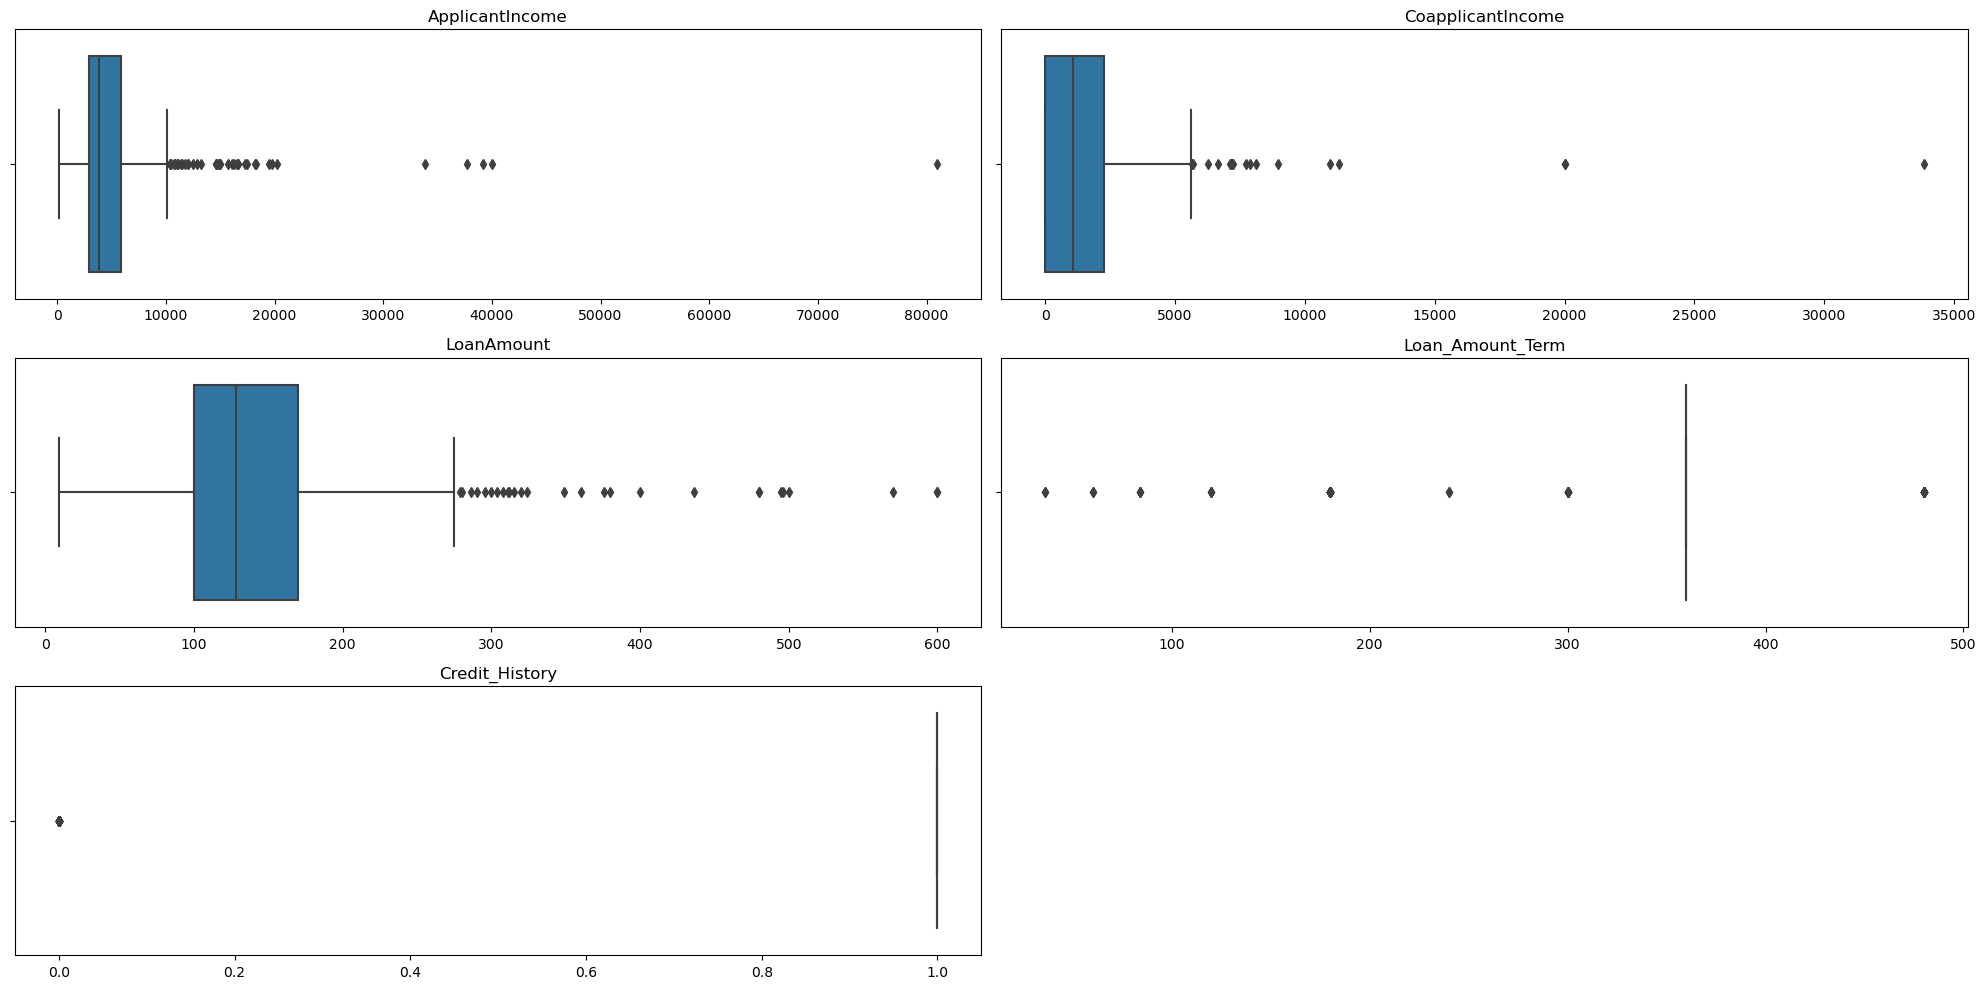

In [19]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=data[col])
    plt.title(col)
    plt.xlabel('')

plt.tight_layout()
plt.show()

### Generating barplot for the Loan_status value count

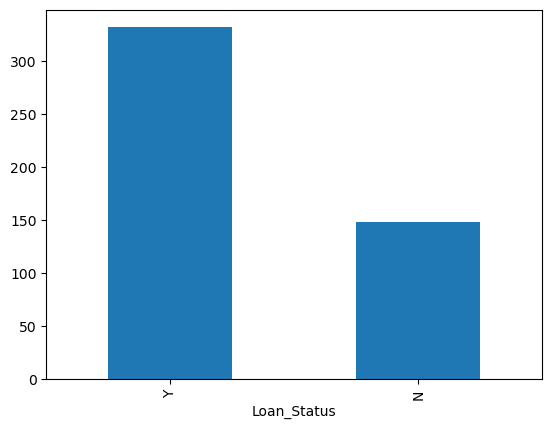

In [20]:
data["Loan_Status"].value_counts().plot.bar()
plt.show()

### 6. Bivariate Analysis:

In [21]:
numerical_cols= data[['ApplicantIncome','CoapplicantIncome','LoanAmount', 'Loan_Amount_Term', 'Credit_History']]
correlation_matrix = numerical_cols.corr(method='pearson')
correlation_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000


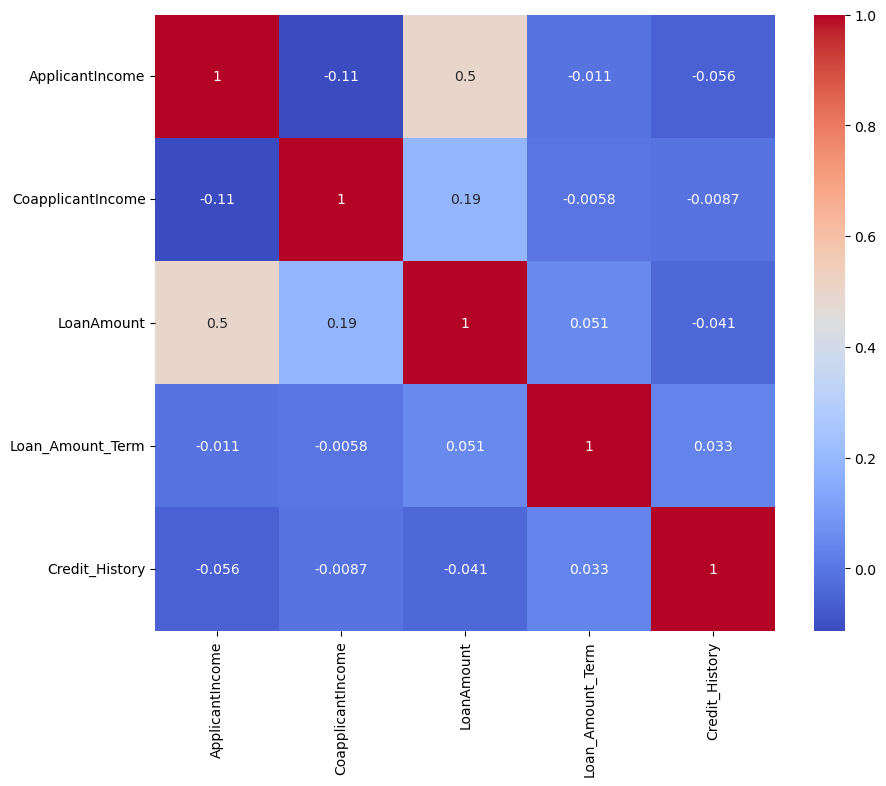

In [22]:
# Creating a heatmap to see correlation of numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

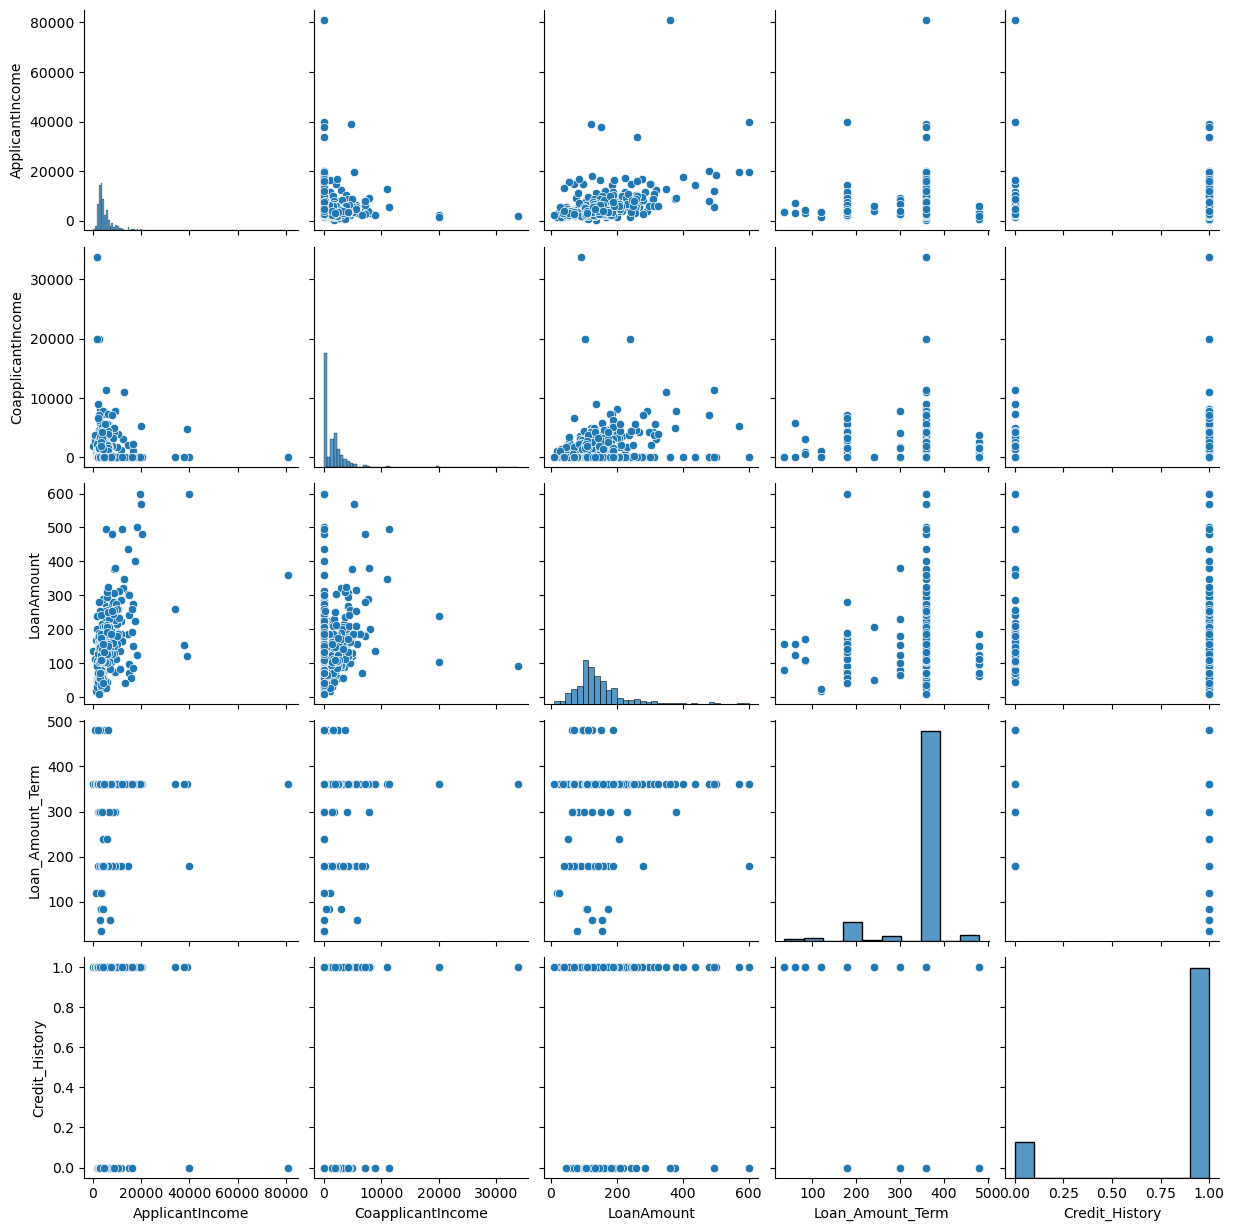

In [23]:
# Plotting scatter matrix between numerical features
sns.pairplot(data[numerical_columns])
plt.show()

### 7. Data Rescaling (Optional):

In [24]:
newdata = data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]
newdata.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
5,5417,4196.0,267.0,360.0,1.0


- rescale the "newdata" use MinMaxScaler class

In [25]:
scaler = MinMaxScaler()
new_scaled_data = scaler.fit_transform(newdata)
new_scaled_data = pd.DataFrame(new_scaled_data, columns=newdata.columns)
new_scaled_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.054830,0.044567,0.201354,0.72973,1.0
1,0.035250,0.000000,0.096447,0.72973,1.0
2,0.030093,0.069687,0.187817,0.72973,1.0
3,0.072356,0.000000,0.223350,0.72973,1.0
4,0.065145,0.124006,0.436548,0.72973,1.0


- Use L1 normalize technique to normalize the "newdata"

In [26]:
normalizer = Normalizer(norm="l1")
new_norm_data = normalizer.fit_transform(newdata)
new_norm_data = pd.DataFrame(new_norm_data, columns=newdata.columns)
new_norm_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.696505,0.229179,0.019453,0.054711,0.000152
1,0.875401,0.000000,0.019259,0.105048,0.000292
2,0.476392,0.434895,0.022132,0.066396,0.000184
3,0.922793,0.000000,0.021686,0.055368,0.000154
4,0.528952,0.409726,0.026072,0.035153,0.000098


In [27]:
# Initialize Binarizer with threshold
binarizer = Binarizer(threshold=0.0)

# Binarize the data
newdata_binarized = binarizer.fit_transform(newdata)

# Convert the binarized data back to a DataFrame
newdata_binarized = pd.DataFrame(newdata_binarized, columns=newdata.columns)

newdata_binarized.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1.0,1.0,1.0,1.0,1.0
1,1.0,0.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0
3,1.0,0.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0


In [28]:
# Standardize the data
scaler = StandardScaler()
newdata_standardized = scaler.fit_transform(newdata)
# Convert the standardized data back to a DataFrame
newdata_standard = pd.DataFrame(newdata_standardized, columns=newdata.columns)
newdata_standard.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,-0.137970,-0.027952,-0.208089,0.275542,0.413197
1,-0.417536,-0.604633,-0.979001,0.275542,0.413197
2,-0.491180,0.297100,-0.307562,0.275542,0.413197
3,0.112280,-0.604633,-0.046446,0.275542,0.413197
4,0.009319,0.999978,1.520245,0.275542,0.413197


<hr />

- Implement data labelling to "Loan_Status"

In [29]:
encoder = LabelEncoder()
data['Loan_Status'] = encoder.fit_transform(data['Loan_Status'])
data['Loan_Status'].head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int32

### Feature Selection (Optional)

In [30]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


<hr />

- Encode Loan_Status as ouput y.

In [31]:
y = data['Loan_Status']
y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int32

<hr />

- select three of the attributes having best features with the help of chi-square statistical test and print them

In [32]:
X = data.drop('Loan_Status', axis=1)

In [33]:
chi_scores = chi2(newdata, y)
chi_features = newdata.columns[np.argsort(chi_scores[0])[::-1]]
chi_features[:3]

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], dtype='object')

<hr />
- Implement RFE feature selection technique to select the best two attributes and print them

In [34]:
model = LogisticRegression()
rfe = RFE(estimator=model, n_features_to_select=2, step=10, verbose=5)
rfe.fit(newdata, y)
rfe_support = newdata.columns[rfe.get_support()]
print('Top 2 features:', rfe_support)

Fitting estimator with 5 features.
Top 2 features: Index(['LoanAmount', 'Credit_History'], dtype='object')


<hr />

- implement PCA feature selection technique

In [35]:
pca = PCA()
pcafit = pca.fit(newdata)
print('PCA Explained Variance Ratio: ', pca.explained_variance_ratio_)

PCA Explained Variance Ratio:  [8.26847678e-01 1.72928069e-01 1.20516461e-04 1.03732901e-04
 3.18659500e-09]


<hr />

- implement this feature selection technique with the help of ExtraTreeClassifier class

In [36]:
model = ExtraTreesClassifier()
model.fit(newdata,y)
print('Features from ExtraTreeClassifier: ', newdata.columns[np.argsort(model.feature_importances_)[::-1][:3]])

Features from ExtraTreeClassifier:  Index(['ApplicantIncome', 'Credit_History', 'LoanAmount'], dtype='object')
